# Analyse et Optimisation du Réseau Ferroviaire Marocain

**Projet de Théorie des Graphes**

Ce notebook analyse le réseau ferroviaire marocain en utilisant la théorie des graphes pour modéliser les connexions entre les gares et optimiser les trajets.

---
## 1. Imports et Configuration

In [1]:
# Bibliothèques principales
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Interface interactive
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Configuration de l'affichage
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10

print("✓ Toutes les bibliothèques sont chargées avec succès!")

✓ Toutes les bibliothèques sont chargées avec succès!


---
## 2. Chargement et Prétraitement des Données

In [2]:
# Chargement du fichier CSV
df = pd.read_csv('projet_reseau_maroc.csv')

# Nettoyage des données : supprimer les espaces en début/fin des noms de gares
df['Source'] = df['Source'].str.strip()
df['Target'] = df['Target'].str.strip()

# Afficher les premières lignes
print("Aperçu des données du réseau ferroviaire:")
print(f"Nombre de connexions: {len(df)}")
display(df.head(10))

Aperçu des données du réseau ferroviaire:
Nombre de connexions: 25


,Source,Target,Distance_km,Duree_min,Type_Train,Frequence_par_heure
0,Tanger Ville,Kenitra,200,50,Al Boraq,1.0
1,Kenitra,Rabat Agdal,40,25,Al Boraq,1.0
2,Rabat Agdal,Casablanca Voyageurs,90,50,Al Boraq,1.0
3,Kenitra,Sale Tabriquet,35,30,TNR,2.0
4,Sale Tabriquet,Rabat Ville,5,10,TNR,2.0
5,Rabat Ville,Rabat Agdal,3,5,TNR,2.0
6,Rabat Agdal,Casablanca Port,90,60,TNR,2.0
7,Casablanca Voyageurs,Casablanca Port,5,15,Navette,1.0
8,Casablanca Voyageurs,Oasis,5,10,TNR,2.0
9,Oasis,Aeroport Med V,25,30,Al Bidaoui,1.0


In [3]:
# Création du graphe NetworkX (non orienté)
G = nx.Graph()

# Ajout des arêtes avec les attributs
for _, row in df.iterrows():
    G.add_edge(
        row['Source'],
        row['Target'],
        weight=row['Duree_min'],           # Poids principal pour l'optimisation
        distance_km=row['Distance_km'],     # Attribut secondaire
        type_train=row['Type_Train']        # Contexte optionnel
    )

# Informations sur le graphe
print(f"\n=== Informations du Graphe ===")
print(f"Nombre de sommets (gares): {G.number_of_nodes()}")
print(f"Nombre d'arêtes (connexions): {G.number_of_edges()}")
print(f"\nListe des gares:")
for i, node in enumerate(sorted(G.nodes()), 1):
    print(f"  {i:2}. {node}")


=== Informations du Graphe ===
Nombre de sommets (gares): 23
Nombre d'arêtes (connexions): 25

Liste des gares:
   1. Aeroport Med V
   2. Asilah
   3. Benguerir
   4. Casablanca Port
   5. Casablanca Voyageurs
   6. El Jadida
   7. Fes
   8. Guercif
   9. Kenitra
  10. Marrakech
  11. Meknes
  12. Nador
  13. Oasis
  14. Oujda
  15. Rabat Agdal
  16. Rabat Ville
  17. Safi
  18. Sale Tabriquet
  19. Settat
  20. Sidi Kacem
  21. Tanger Ville
  22. Taourirt
  23. Taza


---
## 3. Visualisation Intelligente du Graphe

In [4]:
def generate_abbreviations(station_names):
    """
    Génère des abréviations uniques pour chaque gare.
    
    Logique:
    - Utilise la première lettre par défaut
    - En cas de collision, utilise les deux premières lettres
    - S'assure que chaque abréviation est unique
    
    Args:
        station_names: Liste des noms de gares
        
    Returns:
        dict: Dictionnaire {nom_complet: abréviation}
    """
    abbreviations = {}
    used_abbrevs = set()
    
    # Trier pour un traitement cohérent
    sorted_names = sorted(station_names)
    
    for name in sorted_names:
        # Prendre le premier mot significatif
        first_word = name.split()[0]
        
        # Essayer avec la première lettre
        abbrev = first_word[0].upper()
        
        # Si collision, essayer avec 2 lettres
        if abbrev in used_abbrevs:
            abbrev = first_word[:2].capitalize()
        
        # Si encore collision, essayer avec 3 lettres
        if abbrev in used_abbrevs:
            abbrev = first_word[:3].capitalize()
        
        # Dernier recours: ajouter un chiffre
        if abbrev in used_abbrevs:
            counter = 2
            base_abbrev = abbrev
            while abbrev in used_abbrevs:
                abbrev = f"{base_abbrev}{counter}"
                counter += 1
        
        abbreviations[name] = abbrev
        used_abbrevs.add(abbrev)
    
    return abbreviations

# Générer les abréviations
abbrev_dict = generate_abbreviations(G.nodes())

print("==== Dictionnaire des Abréviations (Légende) ====")
print("="*49)
for name, abbrev in sorted(abbrev_dict.items()):
    print(f"  {abbrev:5} : {name}")
print("="*49)

==== Dictionnaire des Abréviations (Légende) ====
  A     : Aeroport Med V
  As    : Asilah
  B     : Benguerir
  C     : Casablanca Port
  Ca    : Casablanca Voyageurs
  E     : El Jadida
  F     : Fes
  G     : Guercif
  K     : Kenitra
  M     : Marrakech
  Me    : Meknes
  N     : Nador
  O     : Oasis
  Ou    : Oujda
  R     : Rabat Agdal
  Ra    : Rabat Ville
  S     : Safi
  Sa    : Sale Tabriquet
  Se    : Settat
  Si    : Sidi Kacem
  T     : Tanger Ville
  Ta    : Taourirt
  Taz   : Taza


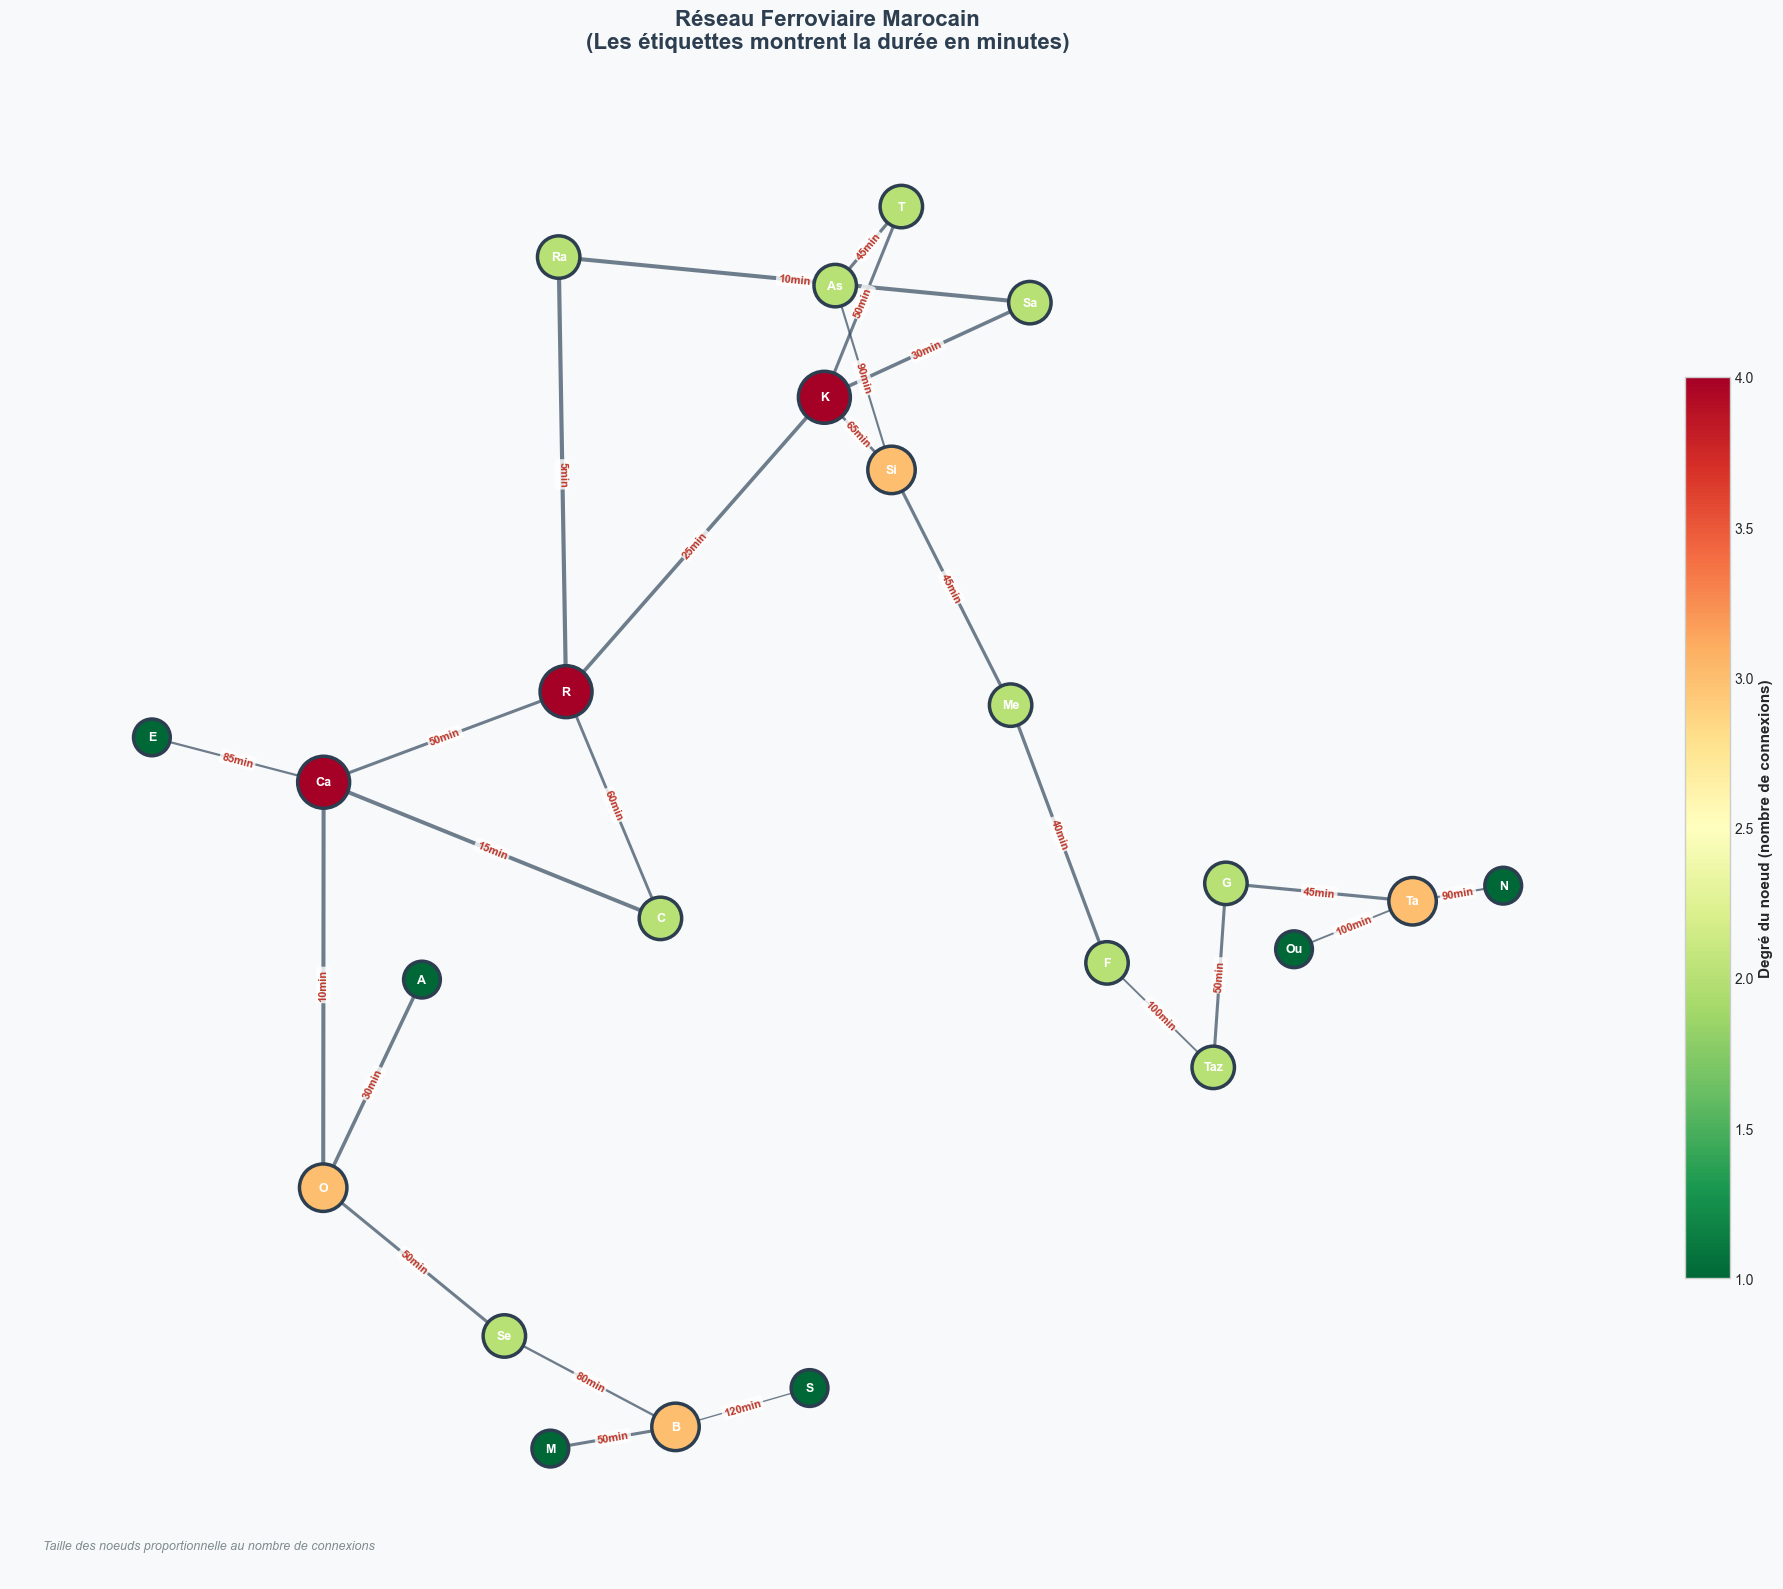


LÉGENDE DES ABRÉVIATIONS
  A    : Aeroport Med V               O    : Oasis
  As   : Asilah                       Ou   : Oujda
  B    : Benguerir                    R    : Rabat Agdal
  C    : Casablanca Port              Ra   : Rabat Ville
  Ca   : Casablanca Voyageurs         S    : Safi
  E    : El Jadida                    Sa   : Sale Tabriquet
  F    : Fes                          Se   : Settat
  G    : Guercif                      Si   : Sidi Kacem
  K    : Kenitra                      T    : Tanger Ville
  M    : Marrakech                    Ta   : Taourirt
  Me   : Meknes                       Taz  : Taza
  N    : Nador


In [5]:


def draw_railway_network(G, abbrev_dict):
    """
    Dessine le réseau ferroviaire avec les abréviations et les temps de trajet.
    Version améliorée avec meilleure séparation des noeuds.
    """
    fig, ax = plt.subplots(figsize=(20, 16))
    fig.patch.set_facecolor('#f8f9fa')
    ax.set_facecolor('#f8f9fa')
    
    # Utiliser spring_layout avec un k élevé pour espacer les noeuds
    # k contrôle la distance optimale entre les noeuds (plus k est grand, plus ils sont espacés)
    pos = nx.spring_layout(G, k=3.8, iterations=100, seed=42)
    
    # Calculer les degrés pour dimensionner les noeuds
    degrees = dict(G.degree())
    max_degree = max(degrees.values())
    min_degree = min(degrees.values())
    
    # Tailles de noeuds plus modérées pour éviter les chevauchements
    # Formule: taille de base + facteur * degré normalisé
    node_sizes = [700 + 700 * ((degrees[node] - min_degree) / max(1, (max_degree - min_degree))) for node in G.nodes()]
    
    # Couleurs vibrantes basées sur le degré
    node_colors = [degrees[node] for node in G.nodes()]
    
    # Dessiner les arêtes avec style amélioré
    # Récupérer les poids pour épaisseur des arêtes
    edge_weights = nx.get_edge_attributes(G, 'weight')
    max_weight = max(edge_weights.values())
    min_weight = min(edge_weights.values())
    
    # Épaisseur inversement proportionnelle au poids (trajets courts = lignes plus épaisses)
    edge_widths = [3 - 2 * ((edge_weights.get(edge, min_weight) - min_weight) / max(1, (max_weight - min_weight))) for edge in G.edges()]
    
    nx.draw_networkx_edges(
        G, pos,
        width=edge_widths,
        alpha=0.7,
        edge_color='#34495e',
        style='solid',
        ax=ax
    )
    
    # Dessiner les noeuds avec bordure pour meilleure séparation
    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_size=node_sizes,
        node_color=node_colors,
        cmap=plt.cm.RdYlGn_r,
        alpha=1.0,
        edgecolors='#2c3e50',
        linewidths=2.5,
        ax=ax
    )
    
    # Ajouter les abréviations comme labels avec fond semi-transparent
    labels = {node: abbrev_dict[node] for node in G.nodes()}
    
    # Labels avec meilleur contraste
    nx.draw_networkx_labels(
        G, pos,
        labels=labels,
        font_size=9,
        font_weight='bold',
        font_color='white',
        ax=ax
    )
    
    # Ajouter les durées sur les arêtes avec meilleur positionnement
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: f"{v}min" for k, v in edge_labels.items()}
    
    # Positionner les labels d'arêtes avec un léger décalage
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_size=8,
        font_color='#c0392b',
        font_weight='bold',
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.8),
        ax=ax
    )
    
    # Barre de couleur pour les degrés avec style amélioré
    sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn_r, norm=plt.Normalize(vmin=min_degree, vmax=max_degree))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=20, pad=0.02)
    cbar.set_label('Degré du noeud (nombre de connexions)', fontsize=11, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)
    
    # Titre avec style
    ax.set_title('Réseau Ferroviaire Marocain\n(Les étiquettes montrent la durée en minutes)', 
                 fontsize=16, fontweight='bold', pad=20, color='#2c3e50')
    ax.axis('off')
    
    # Ajouter une petite note
    ax.text(0.02, 0.02, 'Taille des noeuds proportionnelle au nombre de connexions',
            transform=ax.transAxes, fontsize=9, fontstyle='italic', color='#7f8c8d')
    
    plt.tight_layout()
    plt.show()
    
    # Afficher la légende sous le graphe
    print("\n" + "="*60)
    print("LÉGENDE DES ABRÉVIATIONS")
    print("="*60)
    
    # Afficher en colonnes
    items = sorted(abbrev_dict.items())
    mid = len(items) // 2 + len(items) % 2
    
    for i in range(mid):
        left = f"{items[i][1]:4} : {items[i][0]}"
        if i + mid < len(items):
            right = f"{items[i+mid][1]:4} : {items[i+mid][0]}"
            print(f"  {left:<35} {right}")
        else:
            print(f"  {left}")
    print("="*60)


# Dessiner le réseau
draw_railway_network(G, abbrev_dict)


---
## 4. Analyse Mathématique (Théorie des Graphes)

### 4.1 Matrice d'Adjacence

In [6]:
def compute_adjacency_matrix(G):
    """
    Calcule et affiche la matrice d'adjacence du graphe.
    
    La matrice d'adjacence A est une matrice carrée où:
    - A[i][j] = poids de l'arête si i et j sont adjacents
    - A[i][j] = 0 sinon
    """
    nodes = sorted(G.nodes())
    n = len(nodes)
    node_to_idx = {node: i for i, node in enumerate(nodes)}
    
    # Créer la matrice avec les poids (durées)
    adj_matrix = np.zeros((n, n), dtype=int)
    
    for (u, v, data) in G.edges(data=True):
        i, j = node_to_idx[u], node_to_idx[v]
        weight = data.get('weight', 1)
        adj_matrix[i][j] = weight
        adj_matrix[j][i] = weight  # Graphe non orienté
    
    # Convertir en DataFrame pour un affichage plus lisible
    adj_df = pd.DataFrame(adj_matrix, index=nodes, columns=nodes)
    
    return adj_df

def style_adjacency_matrix(df):
    """Style the adjacency matrix with proper color scaling for non-zero values."""
    # Get the min and max of non-zero values for proper scaling
    non_zero_values = df.values[df.values > 0]
    if len(non_zero_values) > 0:
        vmin = non_zero_values.min()
        vmax = non_zero_values.max()
    else:
        vmin, vmax = 0, 1
    
    def color_cell(val):
        if val == 0:
            return 'background-color: white; color: #cccccc'
        else:
            # Normalize the value between 0 and 1
            normalized = (val - vmin) / (vmax - vmin) if vmax > vmin else 0.5
            # Use a color scale from light yellow to dark red
            r = int(255)
            g = int(255 * (1 - normalized * 0.8))
            b = int(255 * (1 - normalized))
            return f'background-color: rgb({r},{g},{b}); color: black'
    
    return df.style.applymap(color_cell).format(precision=0)

# Calculer et afficher la matrice d'adjacence
print("=== MATRICE D'ADJACENCE ===")
print("(Les valeurs représentent la durée du trajet en minutes, 0 = pas de connexion directe)\n")

adjacency_df = compute_adjacency_matrix(G)
display(style_adjacency_matrix(adjacency_df))

=== MATRICE D'ADJACENCE ===
(Les valeurs représentent la durée du trajet en minutes, 0 = pas de connexion directe)



C:\Users\pc\AppData\Local\Temp\ipykernel_23092\3077133836.py:49: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return df.style.applymap(color_cell).format(precision=0)


,Aeroport Med V,Asilah,Benguerir,Casablanca Port,Casablanca Voyageurs,El Jadida,Fes,Guercif,Kenitra,Marrakech,Meknes,Nador,Oasis,Oujda,Rabat Agdal,Rabat Ville,Safi,Sale Tabriquet,Settat,Sidi Kacem,Tanger Ville,Taourirt,Taza
Aeroport Med V,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0
Asilah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,45,0,0
Benguerir,0,0,0,0,0,0,0,0,0,50,0,0,0,0,0,0,120,0,80,0,0,0,0
Casablanca Port,0,0,0,0,15,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0
Casablanca Voyageurs,0,0,0,15,0,85,0,0,0,0,0,0,10,0,50,0,0,0,0,0,0,0,0
El Jadida,0,0,0,0,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fes,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,100
Guercif,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,50
Kenitra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,30,0,65,50,0,0
Marrakech,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4.2 Matrice d'Incidence

In [7]:
def compute_incidence_matrix(G):
    """
    Calcule et affiche la matrice d'incidence du graphe.
    
    La matrice d'incidence B est une matrice où:
    - Les lignes représentent les sommets
    - Les colonnes représentent les arêtes
    - B[i][e] = 1 si le sommet i est incident à l'arête e
    """
    nodes = sorted(G.nodes())
    edges = list(G.edges())
    
    n_nodes = len(nodes)
    n_edges = len(edges)
    
    node_to_idx = {node: i for i, node in enumerate(nodes)}
    
    # Créer la matrice d'incidence
    inc_matrix = np.zeros((n_nodes, n_edges), dtype=int)
    
    # Créer les labels des arêtes
    edge_labels = []
    for e_idx, (u, v) in enumerate(edges):
        # Utiliser les abréviations pour les labels des arêtes
        edge_labels.append(f"e{e_idx+1}")
        inc_matrix[node_to_idx[u]][e_idx] = 1
        inc_matrix[node_to_idx[v]][e_idx] = 1
    
    # Convertir en DataFrame
    inc_df = pd.DataFrame(inc_matrix, index=nodes, columns=edge_labels)
    
    return inc_df, edges

# Calculer et afficher la matrice d'incidence
print("=== MATRICE D'INCIDENCE ===")
print("(1 = le sommet est incident à l'arête, 0 = non incident)\n")

incidence_df, edges_list = compute_incidence_matrix(G)
display(incidence_df.style.background_gradient(cmap='Blues', vmin=0, vmax=1))

# Afficher la correspondance des arêtes
print("\n=== Correspondance des Arêtes ===")
for i, (u, v) in enumerate(edges_list, 1):
    weight = G[u][v]['weight']
    print(f"  e{i}: {u} <-> {v} ({weight} min)")

=== MATRICE D'INCIDENCE ===
(1 = le sommet est incident à l'arête, 0 = non incident)



,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17,e18,e19,e20,e21,e22,e23,e24,e25
Aeroport Med V,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Asilah,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Benguerir,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
Casablanca Port,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Casablanca Voyageurs,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
El Jadida,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
Guercif,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
Kenitra,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Marrakech,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0



=== Correspondance des Arêtes ===
  e1: Tanger Ville <-> Kenitra (50 min)
  e2: Tanger Ville <-> Asilah (45 min)
  e3: Kenitra <-> Rabat Agdal (25 min)
  e4: Kenitra <-> Sale Tabriquet (30 min)
  e5: Kenitra <-> Sidi Kacem (65 min)
  e6: Rabat Agdal <-> Casablanca Voyageurs (50 min)
  e7: Rabat Agdal <-> Rabat Ville (5 min)
  e8: Rabat Agdal <-> Casablanca Port (60 min)
  e9: Casablanca Voyageurs <-> Casablanca Port (15 min)
  e10: Casablanca Voyageurs <-> Oasis (10 min)
  e11: Casablanca Voyageurs <-> El Jadida (85 min)
  e12: Sale Tabriquet <-> Rabat Ville (10 min)
  e13: Oasis <-> Aeroport Med V (30 min)
  e14: Oasis <-> Settat (50 min)
  e15: Settat <-> Benguerir (80 min)
  e16: Benguerir <-> Marrakech (50 min)
  e17: Benguerir <-> Safi (120 min)
  e18: Sidi Kacem <-> Meknes (45 min)
  e19: Sidi Kacem <-> Asilah (90 min)
  e20: Meknes <-> Fes (40 min)
  e21: Fes <-> Taza (100 min)
  e22: Taza <-> Guercif (50 min)
  e23: Guercif <-> Taourirt (45 min)
  e24: Taourirt <-> Oujda (100 

### 4.3 Analyse du Voisinage

In [8]:
def analyze_neighborhoods(G):
    """
    Analyse le voisinage de chaque sommet:
    - Liste des voisins directs
    - Degré du sommet
    """
    print("=" * 80)
    print("ANALYSE DU VOISINAGE (Neighbourhood Analysis)")
    print("=" * 80)
    
    # Créer un DataFrame pour un affichage structuré
    data = []
    
    for node in sorted(G.nodes()):
        neighbors = list(G.neighbors(node))
        degree = G.degree(node)
        
        data.append({
            'Gare': node,
            'Degré': degree,
            'Voisins': ', '.join(sorted(neighbors))
        })
    
    neighborhood_df = pd.DataFrame(data)
    
    # Trier par degré décroissant
    neighborhood_df = neighborhood_df.sort_values('Degré', ascending=False)
    
    return neighborhood_df

# Afficher l'analyse du voisinage
neighborhood_df = analyze_neighborhoods(G)
display(neighborhood_df.style.background_gradient(subset=['Degré'], cmap='Greens'))

# Statistiques
print(f"\n=== Statistiques ===")
print(f"Degré moyen: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
print(f"Degré maximum: {max(dict(G.degree()).values())}")
print(f"Degré minimum: {min(dict(G.degree()).values())}")

ANALYSE DU VOISINAGE (Neighbourhood Analysis)


,Gare,Degré,Voisins
4,Casablanca Voyageurs,4,"Casablanca Port, El Jadida, Oasis, Rabat Agdal"
14,Rabat Agdal,4,"Casablanca Port, Casablanca Voyageurs, Kenitra, Rabat Ville"
8,Kenitra,4,"Rabat Agdal, Sale Tabriquet, Sidi Kacem, Tanger Ville"
21,Taourirt,3,"Guercif, Nador, Oujda"
12,Oasis,3,"Aeroport Med V, Casablanca Voyageurs, Settat"
2,Benguerir,3,"Marrakech, Safi, Settat"
19,Sidi Kacem,3,"Asilah, Kenitra, Meknes"
20,Tanger Ville,2,"Asilah, Kenitra"
18,Settat,2,"Benguerir, Oasis"
3,Casablanca Port,2,"Casablanca Voyageurs, Rabat Agdal"



=== Statistiques ===
Degré moyen: 2.17
Degré maximum: 4
Degré minimum: 1


---
## 5. Interface d'Optimisation Interactive

In [ ]:


# # --- 1. PRÉPARATION DES DONNÉES ---
# # Liste des villes pour les menus déroulants
# cities = sorted(list(G.nodes()))

# # Liste des liaisons pour le menu "Panne"
# # On crée une liste de tuples : ("Tanger ⟷ Kenitra", ("Tanger", "Kenitra"))
# edges_list = [("Aucune panne (Réseau Normal)", None)]
# for u, v in G.edges():
#     edges_list.append((f"{u} ⟷ {v}", (u, v)))

# # --- 2. CRÉATION DES WIDGETS ---
# style_layout = widgets.Layout(width='350px')
# style_desc = {'description_width': '120px'}

# # Menu Départ
# w_start = widgets.Dropdown(
#     options=cities,
#     description='📍 Ville de Départ :',
#     style=style_desc,
#     layout=style_layout
# )

# # Menu Arrivée
# w_end = widgets.Dropdown(
#     options=cities,
#     value=cities[1] if len(cities) > 1 else None,
#     description='🏁 Ville d\'Arrivée :',
#     style=style_desc,
#     layout=style_layout
# )

# # Menu Panne (Simulation)
# w_broken = widgets.Dropdown(
#     options=edges_list,
#     value=None,
#     description='⛔ Ligne Coupée :',
#     style={'description_width': '120px', 'description_color': 'red'},
#     layout=style_layout
# )

# # Bouton de calcul
# btn_calc = widgets.Button(
#     description='CALCULER L\'ITINÉRAIRE',
#     button_style='primary', # Couleur bleue
#     icon='search',
#     layout=widgets.Layout(width='350px', margin='10px 0px 0px 0px')
# )

# # Zone d'affichage
# out_result = widgets.Output()

# # --- 3. LOGIQUE DE CALCUL ET VISUALISATION ---

# def on_calculate_click(b):
#     with out_result:
#         clear_output()
        
#         # Récupération des valeurs
#         start_node = w_start.value
#         end_node = w_end.value
#         broken_edge = w_broken.value
        
#         # Validation : Départ == Arrivée
#         if start_node == end_node:
#             display(HTML("<div class='result-card' style='background:#ffeaa7; color:#d35400;'>⚠️ <b>Erreur :</b> La ville de départ et d'arrivée sont identiques.</div>"))
#             return

#         # 1. Création d'une COPIE du graphe pour la simulation
#         H = G.copy()
        
#         status_msg = ""
#         # 2. Application de la panne (Suppression de l'arête)
#         if broken_edge:
#             u, v = broken_edge
#             if H.has_edge(u, v):
#                 H.remove_edge(u, v)
#                 status_msg = f"<div style='margin-bottom:10px; padding:8px; background:#fff5f5; border-left:4px solid #c0392b; color:#c0392b; font-weight:bold;'>⚠️ SIMULATION ACTIVE : La ligne {u} ⟷ {v} est fermée.</div>"
        
#         # 3. Calcul Dijkstra
#         try:
#             path = nx.shortest_path(H, source=start_node, target=end_node, weight='weight')
#             total_time = nx.path_weight(H, path, weight='weight')
            
#             # --- A. AFFICHAGE CARTE RÉSULTAT (HTML) ---
            
#             # Création visuelle du chemin (Flèches bleues)
#             path_visual = " <b style='color:#3498db; font-size:1.2em;'>➜</b> ".join([f"<span style='padding:4px 12px; background:#ecf0f1; border-radius:15px; border:1px solid #bdc3c7;'>{city}</span>" for city in path])
            
#             html_content = f"""
#             <div class="result-card">
#                 {status_msg}
#                 <div style="color:#2c3e50; font-size:1.1em; margin-bottom:15px; font-weight:bold;">
#                     ITINÉRAIRE RECOMMANDÉ :
#                 </div>
#                 <div style="margin-bottom:25px; line-height:2.0;">
#                     {path_visual}
#                 </div>
#                 <div style="background:#f1f2f6; padding:15px; border-radius:8px; display:flex; justify-content:space-around; align-items:center;">
#                     <div style="text-align:center;">
#                         <div style="color:#7f8c8d; font-size:0.9em;">TEMPS TOTAL</div>
#                         <div style="color:#2980b9; font-size:1.4em; font-weight:bold;">{total_time} min</div>
#                     </div>
#                     <div style="border-left:1px solid #bdc3c7; height:40px;"></div>
#                     <div style="text-align:center;">
#                         <div style="color:#7f8c8d; font-size:0.9em;">ARRÊTS</div>
#                         <div style="color:#2c3e50; font-size:1.4em; font-weight:bold;">{len(path)-1}</div>
#                     </div>
#                 </div>
#             </div>
#             """
#             display(HTML(html_content))
            
#             # --- B. GÉNÉRATION DU GRAPHE (STYLE EXACT DEMANDÉ) ---
            
#             fig, ax = plt.subplots(figsize=(20, 16))
#             fig.patch.set_facecolor('#f8f9fa')
#             ax.set_facecolor('#f8f9fa')

#             # 1. Layout (Identique au graphe principal : k=3.8)
#             # On utilise 'G' pour positions fixes (ne bougent pas même si panne)
#             pos = nx.spring_layout(G, k=5.1, iterations=100, seed=42)

#             # 2. Calcul des tailles de noeuds (Logique identique)
#             degrees = dict(G.degree())
#             max_deg = max(degrees.values())
#             min_deg = min(degrees.values())
#             node_sizes = [700 + 700 * ((degrees[n] - min_deg) / max(1, (max_deg - min_deg))) for n in G.nodes()]

#             # 3. Couleurs des noeuds
#             node_colors = [degrees[n] for n in G.nodes()]

#             # 4. Dessiner TOUTES les arêtes en fond (gris clair, transparence)
#             nx.draw_networkx_edges(G, pos, edge_color='#bdc3c7', width=1, alpha=0.4, ax=ax)

#             # 5. Dessiner le CHEMIN ACTIF (Bleu épais)
#             path_edges = list(zip(path, path[1:]))
#             nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='#3498db', width=4, ax=ax)

#             # 6. Dessiner la LIGNE COUPÉE (Rouge pointillé) si active
#             if broken_edge:
#                 u, v = broken_edge
#                 nx.draw_networkx_edges(G, pos, edgelist=[(u,v)], edge_color='#e74c3c', width=4, style='dashed', alpha=0.9, ax=ax)

#             # 7. Dessiner les NOEUDS (Style RdYlGn_r avec bordure)
#             nx.draw_networkx_nodes(
#                 G, pos, 
#                 node_size=node_sizes, 
#                 node_color=node_colors, 
#                 cmap=plt.cm.RdYlGn_r, 
#                 alpha=1.0, 
#                 edgecolors='#2c3e50', 
#                 linewidths=2.5, 
#                 ax=ax
#             )

#             # 8. Labels (Abréviations)
#             labels = {n: abbrev_dict[n] for n in G.nodes()} # Utilise le dictionnaire global
#             nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_weight='bold', font_color='white', ax=ax)

#             # 9. Labels d'arêtes (Durées) - Style "bbox" blanc
#             edge_labels = nx.get_edge_attributes(G, 'weight')
#             edge_labels = {k: f"{v}min" for k, v in edge_labels.items()}
#             nx.draw_networkx_edge_labels(
#                 G, pos, 
#                 edge_labels=edge_labels, 
#                 font_size=8, 
#                 font_color='#c0392b', 
#                 font_weight='bold', 
#                 bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.8), 
#                 ax=ax
#             )

#             # Titre dynamique
#             title_text = f"Visualisation : {start_node} → {end_node}"
#             if broken_edge: title_text += " (Mode Panne)"
#             ax.set_title(title_text, fontsize=14, fontweight='bold', color='#2c3e50', pad=15)
#             ax.axis('off')
            
#             plt.show()

#         except nx.NetworkXNoPath:
#             # Cas Impossible
#             error_html = f"""
#             <div class="result-card" style="border-left: 5px solid #e74c3c;">
#                 {status_msg}
#                 <h3 style="color:#c0392b; margin-top:0;">❌ Destination Inaccessible</h3>
#                 <p>Suite à la coupure de la ligne, il n'existe aucun chemin possible entre <b>{start_node}</b> et <b>{end_node}</b>.</p>
#                 <p>Le réseau est mathématiquement déconnecté (plusieurs composantes connexes).</p>
#             </div>
#             """
#             display(HTML(error_html))

# # --- 4. ASSEMBLAGE DE L'INTERFACE ---

# # Liaison du clic bouton
# btn_calc.on_click(on_calculate_click)

# # Mise en page verticale
# ui_container = widgets.VBox([
#     widgets.HTML("<h3 style='color:#2c3e50; border-bottom:2px solid #3498db; padding-bottom:5px;'>🚆 Planificateur d'Itinéraire Intelligent</h3>"),
#     widgets.VBox([w_start, w_end], layout=widgets.Layout(margin='10px 0px')),
#     w_broken,
#     btn_calc,
#     out_result
# ])

# # Affichage final
# display(ui_container)

---
## 6. Fonctionnalités Avancées (Bonus)

### 6.1 Détection des Hubs (Centralité d'Intermédiarité)

ANALYSE DE CENTRALITÉ D'INTERMÉDIARITÉ (Betweenness Centrality)

Cette mesure identifie les gares les plus critiques du réseau (hubs).
Plus la valeur est élevée, plus la gare est importante pour la connectivité.



,Gare,Centralité,Importance
0,Kenitra,0.554100,⭐⭐⭐⭐⭐
1,Rabat Agdal,0.554100,⭐⭐⭐⭐⭐
2,Casablanca Voyageurs,0.480500,⭐⭐⭐⭐⭐
3,Sidi Kacem,0.454500,⭐⭐⭐⭐⭐
4,Meknes,0.415600,⭐⭐⭐⭐⭐
5,Oasis,0.385300,⭐⭐⭐⭐⭐
6,Fes,0.368000,⭐⭐⭐⭐⭐
7,Taza,0.311700,⭐⭐⭐⭐⭐
8,Settat,0.246800,⭐⭐⭐⭐⭐
9,Guercif,0.246800,⭐⭐⭐⭐⭐


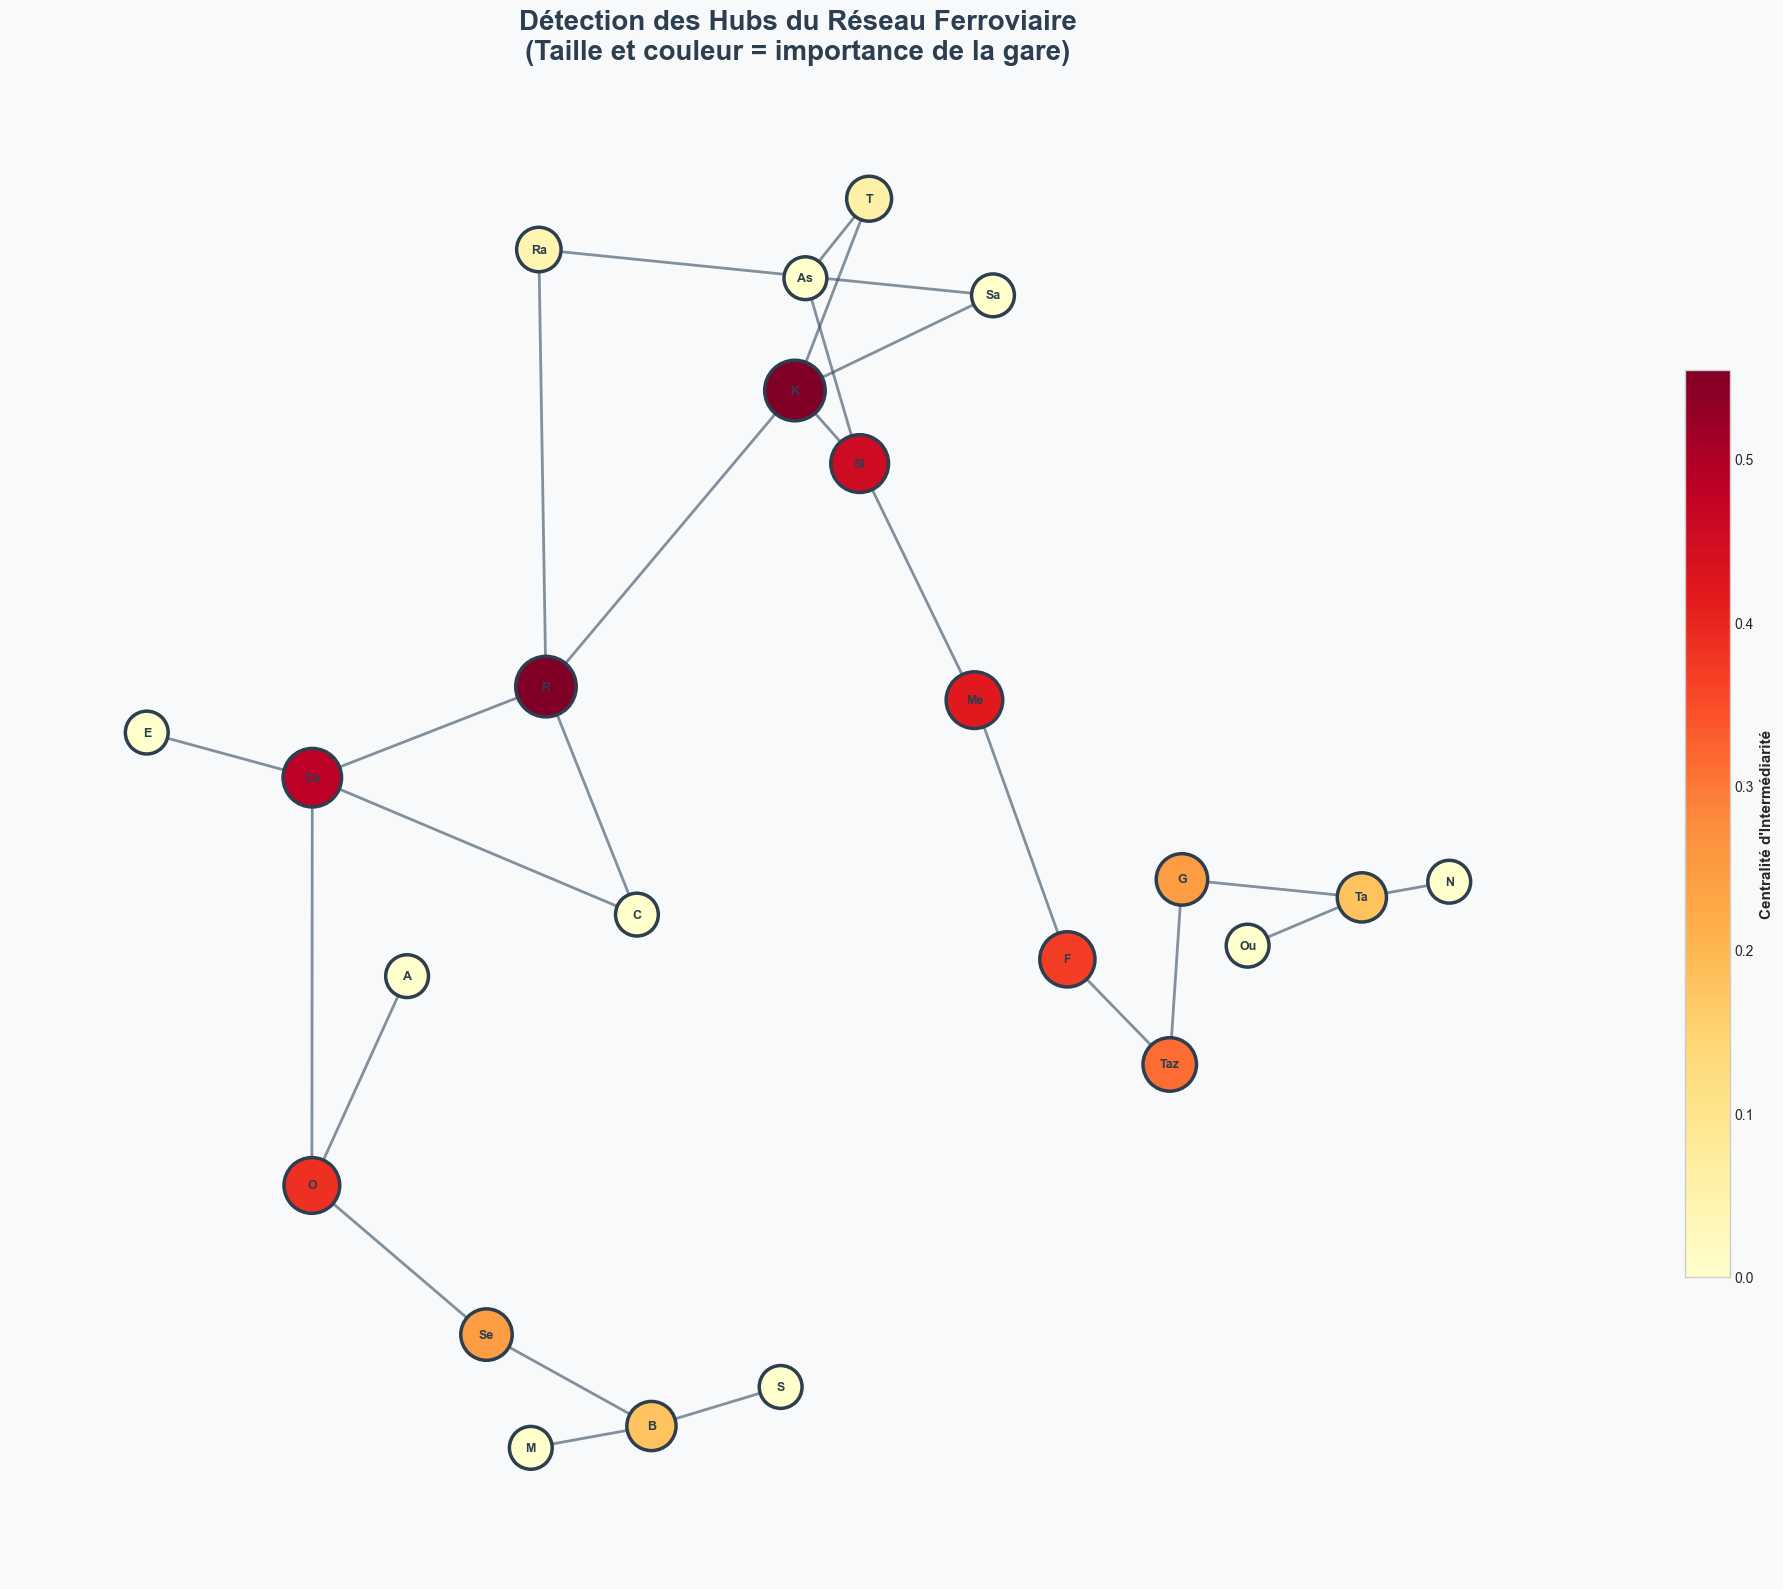


TOP 3 DES HUBS PRINCIPAUX:
   1. Kenitra (centralité: 0.5541)
   2. Rabat Agdal (centralité: 0.5541)
   3. Casablanca Voyageurs (centralité: 0.4805)


In [10]:

def analyze_betweenness_centrality(G):
    """
    Calcule et visualise la centralité d'intermédiarité (Betweenness Centrality).
    
    Cette mesure identifie les gares les plus "critiques" du réseau,
    c'est-à-dire celles qui se trouvent sur le plus de chemins les plus courts.
    """
    # Calculer la centralité d'intermédiarité
    betweenness = nx.betweenness_centrality(G, weight='weight')
    
    # Trier par centralité décroissante
    sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
    
    # Afficher le tableau
    print("=" * 70)
    print("ANALYSE DE CENTRALITÉ D'INTERMÉDIARITÉ (Betweenness Centrality)")
    print("=" * 70)
    print("\nCette mesure identifie les gares les plus critiques du réseau (hubs).")
    print("Plus la valeur est élevée, plus la gare est importante pour la connectivité.\n")
    
    centrality_data = []
    for node, centrality in sorted_betweenness:
        centrality_data.append({
            'Gare': node,
            'Centralité': round(centrality, 4),
            'Importance': '⭐' * min(5, int(centrality * 20) + 1)
        })
    
    centrality_df = pd.DataFrame(centrality_data)
    display(centrality_df.style.background_gradient(subset=['Centralité'], cmap='Reds'))
    
    # Visualisation graphique avec meilleure séparation
    fig, ax = plt.subplots(figsize=(20, 16))
    fig.patch.set_facecolor('#f8f9fa')
    ax.set_facecolor('#f8f9fa')
    
    # Utiliser spring_layout avec k élevé pour espacer les noeuds
    pos = nx.spring_layout(G, k=3.8, iterations=100, seed=42)
    
    # Taille des noeuds modérée pour éviter les chevauchements
    max_between = max(betweenness.values())
    min_between = min(betweenness.values())
    node_sizes = [950 + 950 * ((betweenness[node] - min_between) / max(0.001, max_between - min_between)) for node in G.nodes()]
    node_colors = [betweenness[node] for node in G.nodes()]
    
    # Dessiner les arêtes avec style amélioré
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='#34495e', style='solid', ax=ax)
    
    # Dessiner les noeuds avec bordure pour meilleure séparation
    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_size=node_sizes,
        node_color=node_colors,
        cmap=plt.cm.YlOrRd,
        alpha=1.0,
        edgecolors='#2c3e50',
        linewidths=2.5,
        ax=ax
    )
    
    # Labels avec abréviations et meilleur contraste
    labels = {node: abbrev_dict[node] for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_weight='bold', font_color='#2c3e50', ax=ax)
    
    # Colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=0, vmax=max(betweenness.values())))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.6)
    cbar.set_label('Centralité d\'Intermédiarité', fontsize=11, fontweight='bold')
    
    ax.set_title('Détection des Hubs du Réseau Ferroviaire\n(Taille et couleur = importance de la gare)', 
                 fontsize=20, fontweight='bold', color='#2c3e50')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Identifier les hubs principaux
    top_hubs = sorted_betweenness[:3]
    print("\nTOP 3 DES HUBS PRINCIPAUX:")
    for i, (hub, centrality) in enumerate(top_hubs, 1):
        print(f"   {i}. {hub} (centralité: {centrality:.4f})")
    
    return betweenness

# Analyser la centralité
betweenness_scores = analyze_betweenness_centrality(G)


### 6.2 Analyse de Centralité d'Intermédiarité : Identification des Gares Stratégiques


👑 ANALYSE STRATÉGIQUE : QUI CONTRÔLE LE RÉSEAU ?


,Score,Importance Relative
Kenitra,0.554113,100.0%
Rabat Agdal,0.554113,100.0%
Casablanca Voyageurs,0.480519,86.7%
Sidi Kacem,0.454545,82.0%
Meknes,0.415584,75.0%
Oasis,0.385281,69.5%
Fes,0.367965,66.4%
Taza,0.311688,56.2%
Settat,0.246753,44.5%
Guercif,0.246753,44.5%


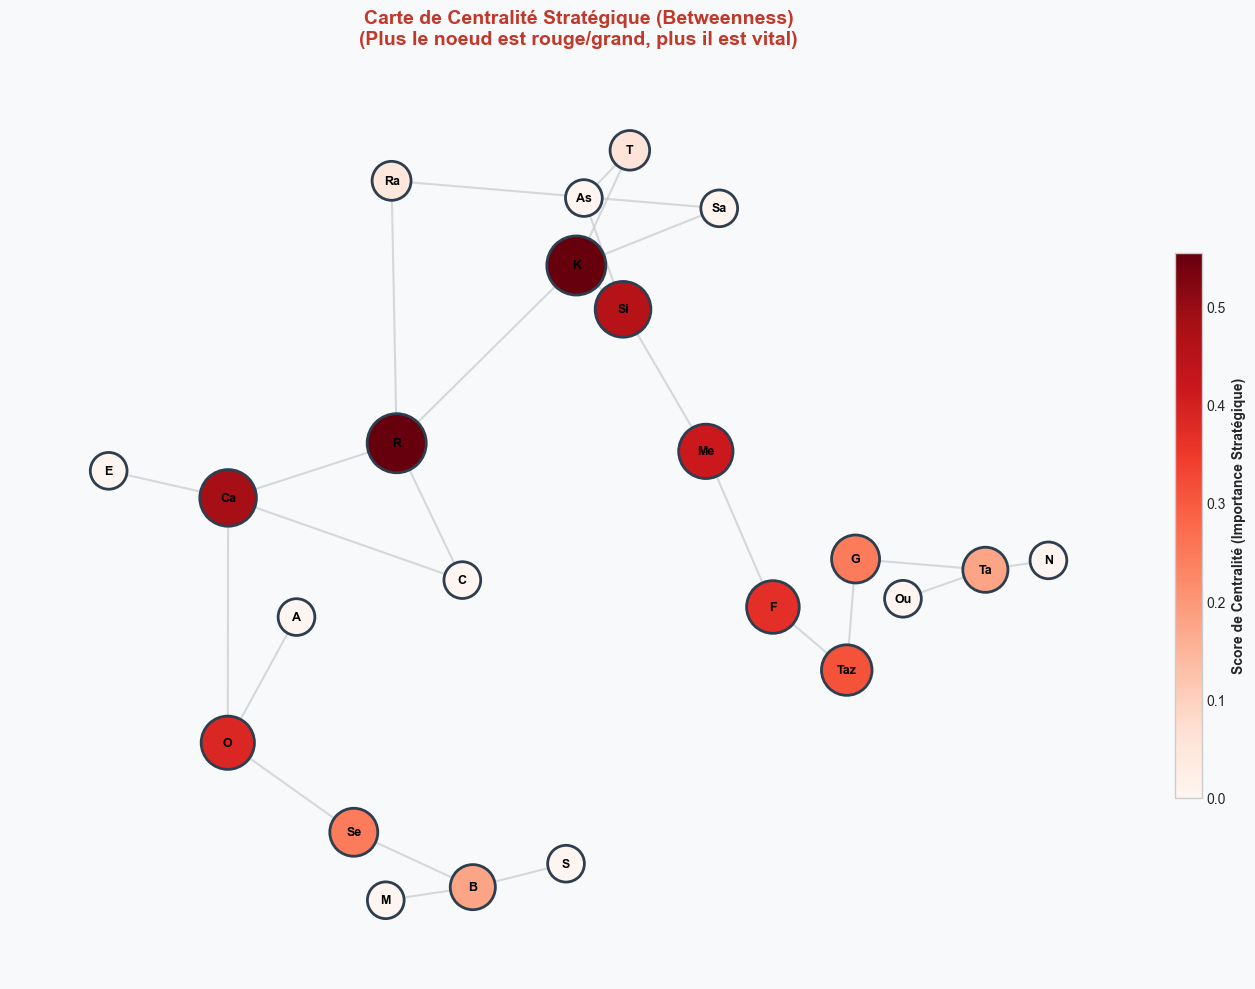

In [11]:

# --- 1. CALCUL MATHÉMATIQUE (The Logic) ---

# Calcul de la "Betweenness Centrality" (Centralité d'Intermédiarité)
# Cela mesure combien de fois une gare se trouve sur le chemin le plus court entre deux autres gares.
# weight='weight' assure qu'on considère le TEMPS de trajet, pas juste le nombre d'arrêts.
centrality = nx.betweenness_centrality(G, weight='weight')

# Conversion en DataFrame pour un affichage propre
df_centrality = pd.DataFrame.from_dict(centrality, orient='index', columns=['Score'])
df_centrality = df_centrality.sort_values(by='Score', ascending=False)

# Création d'une colonne de pourcentage pour la lisibilité
df_centrality['Importance Relative'] = (df_centrality['Score'] / df_centrality['Score'].max()) * 100
df_centrality['Importance Relative'] = df_centrality['Importance Relative'].apply(lambda x: f"{x:.1f}%")

# --- 2. AFFICHAGE TABLEAU (The Dashboard) ---

print("\n" + "="*60)
print("👑 ANALYSE STRATÉGIQUE : QUI CONTRÔLE LE RÉSEAU ?")
print("="*60)

display(HTML("""
<div class='result-card'>
    <h3 style='color:#2c3e50; margin-top:0;'>🧠 Cerveaux Logistiques (Top 5)</h3>
    <p>Ces gares sont les carrefours vitaux du réseau. Si elles ferment, le trafic national est paralysé.</p>
</div>
"""))

# Affichage du Top 5 avec style couleur
display(df_centrality.head(20).style.background_gradient(cmap='Reds', subset=['Score']))

# --- 3. VISUALISATION GRAPHIQUE (Matching Main Graph Style) ---

fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#f8f9fa')

# 1. Layout (Mêmes paramètres que le graphe principal pour cohérence)
pos = nx.spring_layout(G, k=3.8, iterations=100, seed=42)

# 2. Taille des noeuds basée sur la CENTRALITÉ (et non le degré cette fois)
# Les gares stratégiques seront énormes
centrality_values = list(centrality.values())
max_cent = max(centrality_values)
min_cent = min(centrality_values)
node_sizes = [700 + 2000 * ((centrality[n] - min_cent) / max(1, (max_cent - min_cent))) for n in G.nodes()]

# 3. Couleur basée sur la Centralité (Rouge = Critique, Blanc = Périphérique)
node_colors = [centrality[n] for n in G.nodes()]

# 4. Dessiner les arêtes (Gris discret)
nx.draw_networkx_edges(G, pos, edge_color='#bdc3c7', width=1.5, alpha=0.6, ax=ax)

# 5. Dessiner les noeuds (Style Reds -> Rouge Foncé = Haut score)
nodes = nx.draw_networkx_nodes(
    G, pos, 
    node_size=node_sizes, 
    node_color=node_colors, 
    cmap=plt.cm.Reds,  # Utilisation d'une gamme Rouge pour signaler l'importance critique
    alpha=1.0, 
    edgecolors='#2c3e50', 
    linewidths=2.0, 
    ax=ax
)

# 6. Labels (Abréviations)
labels = {n: abbrev_dict[n] for n in G.nodes()}
# Texte noir pour meilleure lisibilité sur le rouge/blanc
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_weight='bold', font_color='black', ax=ax)

# Titre et Configuration
ax.set_title("Carte de Centralité Stratégique (Betweenness)\n(Plus le noeud est rouge/grand, plus il est vital)", 
             fontsize=14, fontweight='bold', color='#c0392b', pad=20)
ax.axis('off')

# Barre de couleur
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=min_cent, vmax=max_cent))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=20, pad=0.02)
cbar.set_label('Score de Centralité (Importance Stratégique)', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 6.3 Analyse de la Stabilité du Réseau

In [12]:
def analyze_network_stability(G):
    """
    Analyse la stabilité et la connectivité du réseau ferroviaire.
    """
    print("=" * 70)
    print("ANALYSE DE LA STABILITÉ DU RÉSEAU")
    print("=" * 70)
    
    # Test de connectivité
    is_connected = nx.is_connected(G)
    
    if is_connected:
        print("\nLe réseau est ENTIÈREMENT CONNECTÉ!")
        print("   → Il est possible de voyager de n'importe quelle gare à n'importe quelle autre.")
    else:
        print("\nLe réseau N'EST PAS entièrement connecté!")
        components = list(nx.connected_components(G))
        print(f"   → Le réseau contient {len(components)} composantes non connectées.")
        for i, comp in enumerate(components, 1):
            print(f"   Composante {i}: {', '.join(comp)}")
    
    # Autres métriques
    print("\nMétriques de stabilité:")
    print("-" * 50)
    
    # Densité du graphe
    density = nx.density(G)
    print(f"   • Densité du graphe: {density:.4f}")
    print(f"     (0 = aucune connexion, 1 = toutes les connexions possibles)")
    
    # Coefficient de clustering moyen
    avg_clustering = nx.average_clustering(G)
    print(f"   • Coefficient de clustering moyen: {avg_clustering:.4f}")
    
    # Diamètre (si connecté)
    if is_connected:
        diameter = nx.diameter(G)
        print(f"   • Diamètre du graphe: {diameter}")
        print(f"     (Nombre maximum d'arêtes entre deux gares quelconques)")
        
        # Rayon
        radius = nx.radius(G)
        print(f"   • Rayon du graphe: {radius}")
        
        # Centre du graphe
        center = nx.center(G)
        print(f"   • Centre du graphe: {', '.join(center)}")
        print(f"     (Gare(s) minimisant la distance maximale aux autres gares)")
    
    # Analyse de vulnérabilité
    print("\n Analyse de Vulnérabilité:")
    print("-" * 50)
    
    # Points d'articulation (gares dont la suppression déconnecterait le réseau)
    articulation_points = list(nx.articulation_points(G))
    
    if articulation_points:
        print(f"   Points d'articulation (gares critiques): {len(articulation_points)}")
        print(f"   La suppression de ces gares déconnecterait le réseau:")
        for ap in sorted(articulation_points):
            print(f"      - {ap}")
    else:
        print("   Aucun point d'articulation trouvé.")
        print("   Le réseau est robuste à la suppression de n'importe quelle gare.")
    
    # Ponts (arêtes dont la suppression déconnecterait le réseau)
    bridges = list(nx.bridges(G))
    
    if bridges:
        print(f"\n   Ponts (connexions critiques): {len(bridges)}")
        print(f"   La suppression de ces connexions déconnecterait le réseau:")
        for u, v in bridges:
            print(f"      - {u} <-> {v}")
    else:
        print("\n    Aucun pont trouvé.")
        print("   Le réseau est robuste à la suppression de n'importe quelle connexion.")
    
    print("\n" + "=" * 70)

# Analyser la stabilité
analyze_network_stability(G)

ANALYSE DE LA STABILITÉ DU RÉSEAU

Le réseau est ENTIÈREMENT CONNECTÉ!
   → Il est possible de voyager de n'importe quelle gare à n'importe quelle autre.

Métriques de stabilité:
--------------------------------------------------
   • Densité du graphe: 0.0988
     (0 = aucune connexion, 1 = toutes les connexions possibles)
   • Coefficient de clustering moyen: 0.0580
   • Diamètre du graphe: 13
     (Nombre maximum d'arêtes entre deux gares quelconques)
   • Rayon du graphe: 7
   • Centre du graphe: Kenitra, Sidi Kacem
     (Gare(s) minimisant la distance maximale aux autres gares)

 Analyse de Vulnérabilité:
--------------------------------------------------
   Points d'articulation (gares critiques): 12
   La suppression de ces gares déconnecterait le réseau:
      - Benguerir
      - Casablanca Voyageurs
      - Fes
      - Guercif
      - Kenitra
      - Meknes
      - Oasis
      - Rabat Agdal
      - Settat
      - Sidi Kacem
      - Taourirt
      - Taza

   Ponts (connexions c

---
## 7. Résumé et Conclusions

In [13]:
def generate_summary(G):
    """
    Génère un résumé complet de l'analyse du réseau.
    """
    print("=" * 70)
    print("RÉSUMÉ DE L'ANALYSE DU RÉSEAU FERROVIAIRE MAROCAIN")
    print("=" * 70)
    
    print("\n STATISTIQUES GÉNÉRALES:")
    print(f"   • Nombre de gares: {G.number_of_nodes()}")
    print(f"   • Nombre de connexions: {G.number_of_edges()}")
    print(f"   • Degré moyen: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
    
    # Gare la plus connectée
    max_degree_node = max(G.nodes(), key=lambda x: G.degree(x))
    print(f"   • Gare la plus connectée: {max_degree_node} ({G.degree(max_degree_node)} connexions)")
    
    # Temps de trajet le plus court et le plus long
    edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
    print(f"   • Trajet le plus court: {min(edge_weights)} minutes")
    print(f"   • Trajet le plus long: {max(edge_weights)} minutes")
    
    print("\n HUBS PRINCIPAUX (par centralité):")
    betweenness = nx.betweenness_centrality(G, weight='weight')
    top_3 = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]
    for i, (node, score) in enumerate(top_3, 1):
        print(f"   {i}. {node}")
    
    print("\nÉTAT DU RÉSEAU:")
    if nx.is_connected(G):
        print("   • Le réseau est ENTIÈREMENT CONNECTÉ")
        print(f"   • Diamètre: {nx.diameter(G)} (nombre max d'étapes entre 2 gares)")
    else:
        print("   • Le réseau N'EST PAS entièrement connecté")
    
    print("\n" + "=" * 70)
    print("Analyse réalisée avec Python, NetworkX, et la Théorie des Graphes.")
    print("=" * 70)

# Générer le résumé
generate_summary(G)

RÉSUMÉ DE L'ANALYSE DU RÉSEAU FERROVIAIRE MAROCAIN

 STATISTIQUES GÉNÉRALES:
   • Nombre de gares: 23
   • Nombre de connexions: 25
   • Degré moyen: 2.17
   • Gare la plus connectée: Kenitra (4 connexions)
   • Trajet le plus court: 5 minutes
   • Trajet le plus long: 120 minutes

 HUBS PRINCIPAUX (par centralité):
   1. Kenitra
   2. Rabat Agdal
   3. Casablanca Voyageurs

ÉTAT DU RÉSEAU:
   • Le réseau est ENTIÈREMENT CONNECTÉ
   • Diamètre: 13 (nombre max d'étapes entre 2 gares)

Analyse réalisée avec Python, NetworkX, et la Théorie des Graphes.
